<a href="https://colab.research.google.com/github/Harichandana28/MINIPROJECT/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
 
target=[]
images=[]
flat_data=[]
 
DATADIR='/content/drive/MyDrive/IMAGES'
CATEGORIES=['Rose','Lilly']
 
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
 
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [ ]:
flat_data[0]

array([0.24077124, 0.4839085 , 0.1455817 , ..., 0.39607843, 0.49256209,
       0.38898039])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

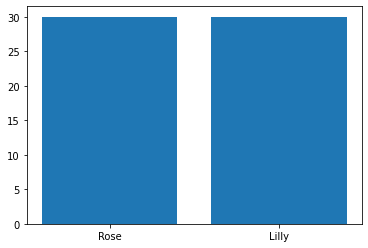

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_pred,y_test)

array([[4, 0],
       [7, 7]])

In [ ]:
accuracy_score(y_pred,y_test)

0.6111111111111112

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[0.1,1,10,100],'kernel':['linear','rbf']}
]
grid=GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
model=svm.SVC(kernel='linear',C=0.1,gamma='auto',probability=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 1],
       [2, 6]])

In [ ]:
accuracy_score(y_pred,y_test)

0.8333333333333334

In [ ]:
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHkJXVSBPJdaWbdLsuhaLihXelpl5aMdlUYw&usqp=CAU
PREDICTED OUTPUT:Lilly


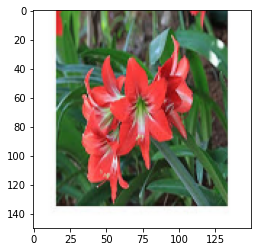

In [ ]:
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
#https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHkJXVSBPJdaWbdLsuhaLihXelpl5aMdlUYw&usqp=CAU

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 12.8MB/s 
     |████████████████████████████████| 4.2MB 49.8MB/s 
     |████████████████████████████████| 174kB 65.1MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 112kB 81.2MB/s 
     |████████████████████████████████| 122kB 71.2MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
#Deployment
%%writefile app.py
import streamlit as st
#import os
#import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Classifier')
st.text('Upload the image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("choose an image...",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES=['Rose','Lilly']
    st.write('Result...')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT:{y_out}')
  q=model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):
    st.write(f'{item}:{q[0][index]*100}%')

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://abe273430aea.ngrok.io
